#**Advance ML Homework_4_ DB Scan Clustering**
Simulasi tugas Mesin Learning Lanjut dengan Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
upload = files.upload()
import io
data = pd.read_csv(io.BytesIO(upload['Dataset.csv']))
data.head(20)

Saving Dataset.csv to Dataset.csv


,ID,JenisKelamin,Umur,PendapatanBulan(Juta),PengeluaranBulanan(%)
0,1,Laki-Laki,19,15,39
1,2,Laki-Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40
5,6,Perempuan,22,17,76
6,7,Perempuan,35,18,6
7,8,Perempuan,23,18,94
8,9,Laki-Laki,64,19,3
9,10,Perempuan,30,19,72


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     50 non-null     int64 
 1   JenisKelamin           50 non-null     object
 2   Umur                   50 non-null     int64 
 3   PendapatanBulan(Juta)  50 non-null     int64 
 4   PengeluaranBulanan(%)  50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data=data.drop(['ID'],axis=1)

In [5]:
data.head(20)

,JenisKelamin,Umur,PendapatanBulan(Juta),PengeluaranBulanan(%)
0,Laki-Laki,19,15,39
1,Laki-Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40
5,Perempuan,22,17,76
6,Perempuan,35,18,6
7,Perempuan,23,18,94
8,Laki-Laki,64,19,3
9,Perempuan,30,19,72


In [6]:
x = data.loc[:, ['PendapatanBulan(Juta)',
                 'PengeluaranBulanan(%)']].values

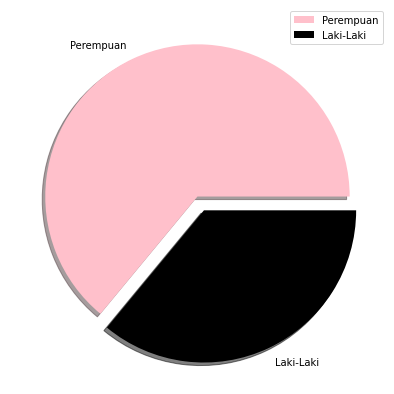

In [7]:
plt.figure(figsize=(7,7))
size=data['JenisKelamin'].value_counts()
label=['Perempuan','Laki-Laki']
color=['Pink','Black']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

In [15]:
data.head(10)

,JenisKelamin,Umur,PendapatanBulan(Juta),PengeluaranBulanan(%)
0,Laki-Laki,19,15,39
1,Laki-Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40
5,Perempuan,22,17,76
6,Perempuan,35,18,6
7,Perempuan,23,18,94
8,Laki-Laki,64,19,3
9,Perempuan,30,19,72


In [16]:
x=data.iloc[:,[2,3]].values
x.shape

(50, 2)

In [22]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=5,min_samples=3,metric='euclidean')

In [23]:
model=db.fit(x)
label=model.labels_
label

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1,  6,  6,  6])

In [26]:
from sklearn import metrics

sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Jumlah Cluster
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('Jumlah Cluster:',n_clusters)

Jumlah Cluster: 7


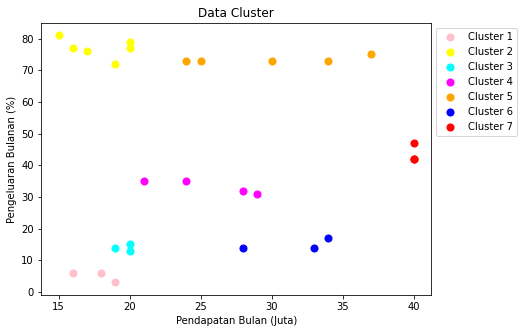

In [31]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow', label='Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan', label='Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta', label='Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange', label='Cluster 5')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue', label='Cluster 6')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red', label='Cluster 7')
plt.xlabel('Pendapatan Bulan (Juta)')
plt.ylabel('Pengeluaran Bulanan (%)')
plt.title('Data Cluster')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()